<a href="https://colab.research.google.com/github/guillerZeva/Proyecto/blob/main/WORDCLOUD_etiquetas_stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese el ID: 95


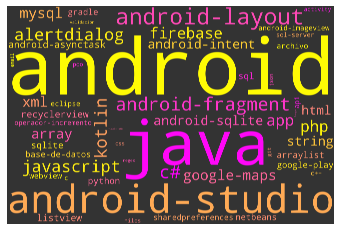

In [45]:
from bs4 import BeautifulSoup as bs
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt

def scraping():
  #Validar usuario existente 
  while True:
    id_user = input("Ingrese el ID: ")
    url = "https://es.stackoverflow.com/users/" + id_user +"?tab=tags"
    res = requests.get(url)
    soup = bs(res.content)
    valida = soup.find('div', class_='grid grid__center w100 h100')
    if valida != None:
      print("Ese usuario no existe")
    else:
      break;

  etiquetas = soup.find_all('a', class_= 'post-tag')
  replicas = soup.find_all('span', class_= 'item-multiplier-count')

  return etiquetas,replicas


#crea un diccionario con los puntos de la etiqueta y los valores 
def frecuenciaEtiquetas(etiquetas, replicas):
  frecuenciaMap = {}

  for i in range(len(etiquetas)):

    if  i < len(replicas):
      frecuenciaMap[etiquetas[i].get_text()] =  float(replicas[i].get_text())
    else:
      frecuenciaMap[etiquetas[i].get_text()] = 1

  return frecuenciaMap   


# Funcion de worldcloud
def createWordCloud(text):
  wc = WordCloud(
      width = 3000, 
      height = 2000, 
      max_font_size=2000, 
      scale=3, 
      background_color="#333333",
      colormap="spring",
      collocations=False,)
  
  wc.generate_from_frequencies(text)
 
 # Mostrar la imagen generada:
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()


freEtiquetas = scraping()

frecuenciaMap = frecuenciaEtiquetas(freEtiquetas[0], freEtiquetas[1])

createWordCloud(frecuenciaMap)


